In [1]:
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
connection = sqlite3.connect('hipparcos.db')

In [3]:
cursor = connection.cursor()

In [4]:
sql_command = """
SELECT data.HIP, RV, Bmag, Vmag
FROM data
JOIN photometry ON data.HIP = photometry.HIP
WHERE RV > 0
ORDER BY Bmag;
"""

In [5]:
cursor.execute(sql_command)

In [6]:
results = cursor.fetchall()

In [7]:
print(results[0])

(30438, 20.299999237060547, -0.4560000002384186, -0.6200000047683716)


In [8]:
HIPs = [item[0] for item in results]
RVs = [item[1] for item in results]
Bmags = [item[2] for item in results]
Vmags = [item[3] for item in results]

### Solution to Exercise 8

In [9]:
connection = sqlite3.connect('hipparcos.db')

In [10]:
cursor = connection.cursor()

In [11]:
sql_command = """
SELECT "B-V", VAbsMag
FROM data
JOIN photometry ON data.HIP = photometry.HIP
WHERE e_Dist !=0
AND e_Dist < 10
AND "B-V" != 0;
"""

In [12]:
cursor.execute(sql_command)

In [13]:
results = cursor.fetchall()

In [14]:
BVs = [item[0] for item in results]
VAbsMags = [item[1] for item in results]

In [15]:
# Another way to create the lists
# BVs = []
# for item in results:
#     BVs.append(item[0])

(16.567999792098998, -8.027999830245971)

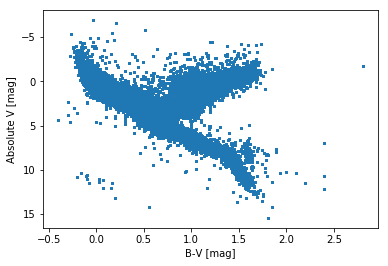

In [16]:
plt.plot(BVs, VAbsMags, '.', ms=4)
plt.xlabel('B-V [mag]')
plt.ylabel('Absolute V [mag]')
plt.ylim(plt.ylim()[::-1])

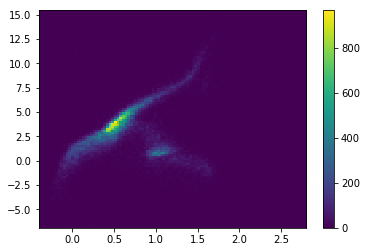

In [17]:
h2d = plt.hist2d(BVs, VAbsMags,bins=100)
plt.colorbar()